<h1 style="text-align:center">Recommending a Business at a particular Tourism Site</h1>

## Introduction

Tourism has always been a thriving sector across the world. No matter which country you are living in, you can always come across a group of people, big or small, who always like to visit attractions. I am a big fan of adventure, and I acknowledge this fact as to how tourism plays a salient role for a traveler/explorer. Tourism is not only an important aspect of a country’s economy but also for its global standing.

###### How come Tourism plays a pivotal role to any country?  
The tourism industry is important for the benefits it brings and due to its role as a commercial activity that creates demand and growth for many more industries. Tourism not only contributes to more economic activities but also generates more employment, revenues, and play a significant role in development.
- Tourism activity creates demand.
- Tourism induces more consumption.
- Tourism industry value chain meets & spreads demand across industries & boosts more economic activities.

## Business Problem

All the interests of tourism tend to reflect on the employment opportunity which it gives to the people of that country. The objective of this project is to analyze the tourist places of a given state in Vietnam, and try to recommend the best location where they can open a restaurant or lodging to make the best use of the opportunity.

The target audience for this project includes people who are interested in opening a restaurant, lodging, transport services, or any other similar businesses which fall within the tourism industry. This also recommends travelers' tourist venues to be visited in a given state of a country.

## Data Anatomization

To tackle the above mentioned problem, we need to have the dataset that includes
- All the districts of Ho Chi Minh, Ha Noi, Da Nang municipalities.
- Latitude and longitudes of all the districts.

###### Source
The major sources of data are derived from:
- https://vi.wikipedia.org/wiki/Th%C3%A0nh_ph%E1%BB%91_H%E1%BB%93_Ch%C3%AD_Minh
- https://en.wikipedia.org/wiki/Hanoi
- https://en.wikipedia.org/wiki/Da_Nang

Those links obtain all the districts of Ho Chi Minh, Ha Noi, Da Nang municipalities. We then use beautifulsoup4 package, a Python module that helps to scrape information from the web pages to extract all the tables from this Wikipedia page and convert it into a pandas dataframe. Then we use Python’s geopy package to obtain the latitude and longitude of all the districts present in the dataframe.  

###### Description of the data
The output shows the final dataset . The dataset consists of a single Dataframe with 9 columns containing state, districts, latitude and longitudes of the particular district etc. Other columns like code, headquarters, population, area and density have also been scraped from the website which can be used for further analysis.


In [1]:
# Install neccessary packages
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Data Exploration

In [3]:
# The code was removed by Watson Studio for sharing.

58


,Municipalities,District/Municipal City,Area (km2),Population (person),Wards,Latitude,Longitude
0,Ho Chi Minh City,Thu Duc City,21156.0,1013795,34 wards,10.829830,106.761790
1,Ho Chi Minh City,District 1,772.0,142625,10 wards,10.774845,106.699350
2,Ho Chi Minh City,District 3,492.0,190375,12 wards,10.771551,106.698380
3,Ho Chi Minh City,District 4,418.0,175329,13 wards,10.759243,106.704890
4,Ho Chi Minh City,District 5,427.0,159073,14 wards,10.756129,106.670375


In [4]:
#drop the rows with missing values in any columns
df.replace('NaN', np.nan, inplace=True)
df = df.dropna()
print(len(df))
df.head()

58


,Municipalities,District/Municipal City,Area (km2),Population (person),Wards,Latitude,Longitude
0,Ho Chi Minh City,Thu Duc City,21156.0,1013795,34 wards,10.829830,106.761790
1,Ho Chi Minh City,District 1,772.0,142625,10 wards,10.774845,106.699350
2,Ho Chi Minh City,District 3,492.0,190375,12 wards,10.771551,106.698380
3,Ho Chi Minh City,District 4,418.0,175329,13 wards,10.759243,106.704890
4,Ho Chi Minh City,District 5,427.0,159073,14 wards,10.756129,106.670375


In [5]:
# Rename columns & convert type of column
df = df.rename(columns={'Area (km2)': 'Area', 'Population (person)': 'Population'})
df = df.astype({"Population": float})
df.dtypes

Municipalities             object 
District/Municipal City    object 
Area                       float64
Population                 float64
Wards                      object 
Latitude                   float64
Longitude                  float64
dtype: object

In [6]:
#to check if all NaN values are removed from dataset

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [Municipalities, District/Municipal City, Area, Population, Wards, Latitude, Longitude]
Index: []


In [7]:
df_state_pop_area_dens = df[['Municipalities', 'Population', 'Area']]
df_state_pop_area_dens.head()

,Municipalities,Population,Area
0,Ho Chi Minh City,1013795.0,21156.0
1,Ho Chi Minh City,142625.0,772.0
2,Ho Chi Minh City,190375.0,492.0
3,Ho Chi Minh City,175329.0,418.0
4,Ho Chi Minh City,159073.0,427.0


In [8]:
df_state = df_state_pop_area_dens.groupby(['Municipalities'], as_index=False).sum()
print(len(df_state))
df_state.head()

3


,Municipalities,Population,Area
0,Da Nang City,1230847.0,984.60
1,Ha Noi City,7868601.0,3349.38
2,Ho Chi Minh City,8836910.0,209538.00


In [9]:
state = df_state.columns
state

Index(['Municipalities', 'Population', 'Area'], dtype='object')

# Data Analysis

<BarContainer object of 3 artists>

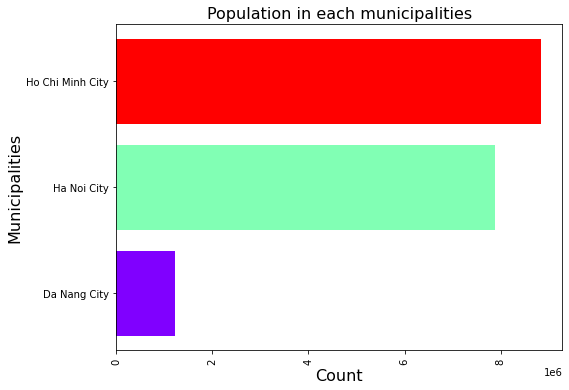

In [10]:
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['Municipalities']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (8, 6))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("Municipalities", fontsize = 16)
plt.title("Population in each municipalities", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [11]:
print('The data has {} municipalities'.format(len(df['Municipalities'].unique())))

The data has 3 municipalities


In [12]:
print('The municipalities are - ' + str(list(df['Municipalities'].unique())))

The municipalities are - ['Ho Chi Minh City', 'Ha Noi City', 'Da Nang City']


#### Enter the state of your choice

In [13]:
state = input('Enter a municipalities - ')

Enter a municipalities - Ho Chi Minh City


#### Obtain latitude and longitude of the given state

In [14]:
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ho Chi Minh City are 10.7715512, 106.6983801.


#### Create a map of State with districts superimposed on top

In [15]:
#dataframe containing only the state which is input by the user
df_user_state = df[df['Municipalities']==state].reset_index(drop=True)
df_user_state.head()

,Municipalities,District/Municipal City,Area,Population,Wards,Latitude,Longitude
0,Ho Chi Minh City,Thu Duc City,21156.0,1013795.0,34 wards,10.829830,106.761790
1,Ho Chi Minh City,District 1,772.0,142625.0,10 wards,10.774845,106.699350
2,Ho Chi Minh City,District 3,492.0,190375.0,12 wards,10.771551,106.698380
3,Ho Chi Minh City,District 4,418.0,175329.0,13 wards,10.759243,106.704890
4,Ho Chi Minh City,District 5,427.0,159073.0,14 wards,10.756129,106.670375


In [16]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['Municipalities'], df_user_state['District/Municipal City']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

# Foursquare API 

#### Define Foursquare Credentials and Version

In [17]:
# The code was removed by Watson Studio for sharing.

#### We need to retrieve only tourist places. Let's check all the categories present in Foursquare API

In [18]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '60e968265a3c3a19792dc854'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [19]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [20]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


## Get the required Catgories 

In [21]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [22]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

#### Function to get the nearby venues of all the districts in the Municipalities

In [23]:
LIMIT = 100

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [24]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District/Municipal City'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Thu Duc City
District 1
District 3
District 4
District 5
District 6
District 7
District 8
District 10
District 11
District 12
Binh Tan District
Binh Thanh District
Go Vap District
Phu Nhuan District
Tan Binh District
Tan Phu District
Binh Chanh District
Can Gio District
Cu Chi District
Hoc Mon District
Nha Be District


In [25]:
print(state_venues.shape)
state_venues

(164, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Thu Duc City,10.829830,106.761790,Saigon Outcast,10.816942,106.729829,Public Art
36,Thu Duc City,10.829830,106.761790,Pasteur Street Brewing Company,10.775220,106.700894,Brewery
45,Thu Duc City,10.829830,106.761790,Công viên Gia Định (Gia Dinh Park),10.812525,106.677332,Park
60,Thu Duc City,10.829830,106.761790,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,10.859220,106.585216,Garden
64,Thu Duc City,10.829830,106.761790,Giang Điền waterfall,10.915094,106.992683,Campground
72,Thu Duc City,10.829830,106.761790,Cu Chi Tunnels (Ben Duoc),11.141302,106.462160,Historic Site
87,Thu Duc City,10.829830,106.761790,Khu Du Lịch Đại Nam,11.039556,106.628966,Theme Park
96,Thu Duc City,10.829830,106.761790,Cu Chi Tunnels Shooting Range,11.059398,106.528242,Gun Range
118,District 1,10.774845,106.699350,Pasteur Street Brewing Company,10.775220,106.700894,Brewery
144,District 1,10.774845,106.699350,Công viên Gia Định (Gia Dinh Park),10.812525,106.677332,Park


In [26]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

164

In [27]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Binh Chanh District,7
1,Binh Tan District,8
2,Binh Thanh District,8
3,Can Gio District,2
4,Cu Chi District,7
5,District 1,8
6,District 10,8
7,District 11,8
8,District 12,8
9,District 3,8


In [28]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

8

## Count number of venues retrieved in each District

<BarContainer object of 22 artists>

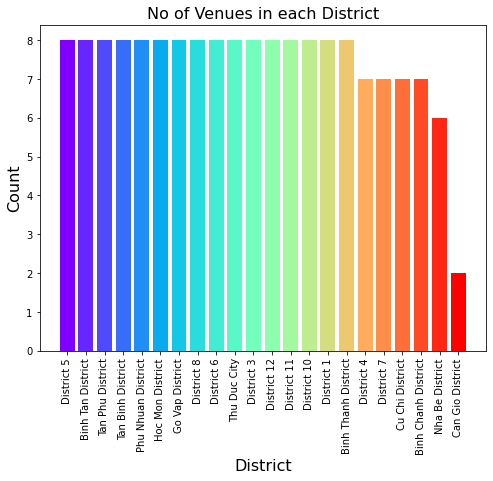

In [29]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (8, 6))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

#### Unique categories curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [31]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Public Art', 'Brewery', 'Park', 'Garden', 'Campground',
       'Historic Site', 'Theme Park', 'Gun Range', 'Beach'], dtype=object)

## Analyze Each District

In [32]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Beach,Brewery,Campground,Garden,Gun Range,Historic Site,Park,Public Art,Theme Park
9,Thu Duc City,0,0,0,0,0,0,0,1,0
36,Thu Duc City,0,1,0,0,0,0,0,0,0
45,Thu Duc City,0,0,0,0,0,0,1,0,0
60,Thu Duc City,0,0,0,1,0,0,0,0,0
64,Thu Duc City,0,0,1,0,0,0,0,0,0


In [33]:
state_venues_onehot.shape

(164, 10)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [34]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Beach,Brewery,Campground,Garden,Gun Range,Historic Site,Park,Public Art,Theme Park
0,Binh Chanh District,0.0,0.142857,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
1,Binh Tan District,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
2,Binh Thanh District,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
3,Can Gio District,0.5,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cu Chi District,0.0,0.142857,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
5,District 1,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
6,District 10,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
7,District 11,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
8,District 12,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
9,District 3,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000


In [35]:
state_venues_grouped.shape

(22, 10)

#### Print each District along with the top 5 most common venues

In [36]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Binh Chanh District----
           venue  freq
0  Brewery        0.14
1  Garden         0.14
2  Gun Range      0.14
3  Historic Site  0.14
4  Park           0.14
5  Public Art     0.14
6  Theme Park     0.14
7  Beach          0.00


----Binh Tan District----
           venue  freq
0  Brewery        0.12
1  Campground     0.12
2  Garden         0.12
3  Gun Range      0.12
4  Historic Site  0.12
5  Park           0.12
6  Public Art     0.12
7  Theme Park     0.12


----Binh Thanh District----
           venue  freq
0  Brewery        0.12
1  Campground     0.12
2  Garden         0.12
3  Gun Range      0.12
4  Historic Site  0.12
5  Park           0.12
6  Public Art     0.12
7  Theme Park     0.12


----Can Gio District----
           venue  freq
0  Beach          0.5 
1  Brewery        0.5 
2  Campground     0.0 
3  Garden         0.0 
4  Gun Range      0.0 
5  Historic Site  0.0 
6  Park           0.0 
7  Public Art     0.0 


----Cu Chi District----
           venue  freq
0  Brewery

#### Put this into a pandas dataframe

In [37]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category
0,Binh Chanh District,Theme Park,Public Art,Park,Historic Site,Gun Range,Garden,Brewery,Campground
1,Binh Tan District,Theme Park,Public Art,Park,Historic Site,Gun Range,Garden,Campground,Brewery
2,Binh Thanh District,Theme Park,Public Art,Park,Historic Site,Gun Range,Garden,Campground,Brewery
3,Can Gio District,Brewery,Beach,Theme Park,Public Art,Park,Historic Site,Gun Range,Garden
4,Cu Chi District,Theme Park,Public Art,Park,Historic Site,Gun Range,Garden,Brewery,Campground


In [39]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Binh Chanh District,Brewery,Pasteur Street Brewing Company
1,Binh Chanh District,Garden,Tùng Sơn Thạch Hoa Viên - Rin Rin Park
2,Binh Chanh District,Gun Range,Cu Chi Tunnels Shooting Range
3,Binh Chanh District,Historic Site,Cu Chi Tunnels (Ben Duoc)
4,Binh Chanh District,Park,Công viên Gia Định (Gia Dinh Park)


In [40]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''
        

#### Most common venues according to venue category in each District

In [41]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [42]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Binh Chanh District,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Pasteur Street Brewing Company,
1,Binh Tan District,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
2,Binh Thanh District,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
3,Can Gio District,Pasteur Street Brewing Company,Ho Tram Beach,,,,,,
4,Cu Chi District,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Pasteur Street Brewing Company,
5,District 1,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
6,District 10,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
7,District 11,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
8,District 12,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company
9,District 3,Khu Du Lịch Đại Nam,Saigon Outcast,Công viên Gia Định (Gia Dinh Park),Cu Chi Tunnels (Ben Duoc),Cu Chi Tunnels Shooting Range,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,Giang Điền waterfall,Pasteur Street Brewing Company


## Get Nearby Businesses

In [43]:
LIMIT = 100

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [44]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Saigon Outcast
Pasteur Street Brewing Company
Công viên Gia Định (Gia Dinh Park)
Tùng Sơn Thạch Hoa Viên - Rin Rin Park
Giang Điền waterfall
Cu Chi Tunnels (Ben Duoc)
Khu Du Lịch Đại Nam
Cu Chi Tunnels Shooting Range
Pasteur Street Brewing Company
Công viên Gia Định (Gia Dinh Park)
Saigon Outcast
Tùng Sơn Thạch Hoa Viên - Rin Rin Park
Giang Điền waterfall
Cu Chi Tunnels (Ben Duoc)
Khu Du Lịch Đại Nam
Cu Chi Tunnels Shooting Range
Pasteur Street Brewing Company
Công viên Gia Định (Gia Dinh Park)
Saigon Outcast
Tùng Sơn Thạch Hoa Viên - Rin Rin Park
Giang Điền waterfall
Cu Chi Tunnels (Ben Duoc)
Khu Du Lịch Đại Nam
Cu Chi Tunnels Shooting Range
Pasteur Street Brewing Company
Saigon Outcast
Công viên Gia Định (Gia Dinh Park)
Tùng Sơn Thạch Hoa Viên - Rin Rin Park
Giang Điền waterfall
Khu Du Lịch Đại Nam
Cu Chi Tunnels Shooting Range
Pasteur Street Brewing Company
Công viên Gia Định (Gia Dinh Park)
Saigon Outcast
Tùng Sơn Thạch Hoa Viên - Rin Rin Park
Giang Điền waterfall
Cu Chi Tunnels (B

In [45]:
print(nearby_business.shape)
nearby_business

(1654, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
4,Saigon Outcast,Mr. Singh Indian Restaurant,10.813892,106.726555,Indian Restaurant
5,Pasteur Street Brewing Company,B3 - Steakhouse & Craft Beer,10.775190,106.702492,Steakhouse
7,Pasteur Street Brewing Company,O Lé,10.774772,106.699524,Spanish Restaurant
8,Pasteur Street Brewing Company,Takashimaya,10.773194,106.701075,Department Store
10,Pasteur Street Brewing Company,Liberty Central Saigon Citypoint Hotel,10.774758,106.700795,Hotel
11,Pasteur Street Brewing Company,Boa cafe,10.775238,106.702770,Coffee Shop
15,Pasteur Street Brewing Company,The Old Compass Cafe,10.774816,106.700685,Café
16,Pasteur Street Brewing Company,Le Bourgeois @Continental,10.776408,106.702731,French Restaurant
18,Pasteur Street Brewing Company,Shin Coffee,10.775219,106.703208,Café
20,Pasteur Street Brewing Company,Pizza 4P's Saigon Center,10.773303,106.700806,Pizza Place


In [46]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Asian Restaurant,85
1,Australian Restaurant,22
2,BBQ Joint,65
3,Bistro,22
4,Burger Joint,44
5,Café,217
6,Clothing Store,22
7,Coffee Shop,176
8,Convenience Store,21
9,Department Store,22


In [47]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 37 uniques categories.


## Perform one-hot encoding of the business categories retrieved

In [48]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Asian Restaurant,Australian Restaurant,BBQ Joint,Bistro,Burger Joint,Café,Clothing Store,Coffee Shop,Convenience Store,Department Store,Eastern European Restaurant,Electronics Store,Flea Market,Flower Shop,Food Truck,French Restaurant,German Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Pizza Place,Restaurant,Shopping Mall,Soup Place,Spa,Spanish Restaurant,Steakhouse,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store
4,Saigon Outcast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Pasteur Street Brewing Company,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,Pasteur Street Brewing Company,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,Pasteur Street Brewing Company,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Pasteur Street Brewing Company,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
nearby_business_onehot.shape

(1654, 38)

#### Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [50]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Asian Restaurant,Australian Restaurant,BBQ Joint,Bistro,Burger Joint,Café,Clothing Store,Coffee Shop,Convenience Store,Department Store,Eastern European Restaurant,Electronics Store,Flea Market,Flower Shop,Food Truck,French Restaurant,German Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Pizza Place,Restaurant,Shopping Mall,Soup Place,Spa,Spanish Restaurant,Steakhouse,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store
0,Cu Chi Tunnels (Ben Duoc),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Cu Chi Tunnels Shooting Range,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000
2,Công viên Gia Định (Gia Dinh Park),0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Giang Điền waterfall,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Ho Tram Beach,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000
5,Khu Du Lịch Đại Nam,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Pasteur Street Brewing Company,0.031746,0.015873,0.031746,0.015873,0.031746,0.111111,0.015873,0.126984,0.000000,0.015873,0.015873,0.000000,0.000000,0.015873,0.015873,0.047619,0.015873,0.0,0.015873,0.126984,0.015873,0.047619,0.015873,0.031746,0.015873,0.015873,0.0,0.031746,0.015873,0.015873,0.015873,0.063492,0.015873,0.015873,0.0,0.015873,0.015873
7,Saigon Outcast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [51]:
nearby_business_grouped.shape

(9, 38)

#### Print each venue along with the top 5 most common business

In [52]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Cu Chi Tunnels (Ben Duoc)----
                venue  freq
0  Motorcycle Shop     1.0 
1  Asian Restaurant    0.0 
2  Hotel               0.0 
3  Italian Restaurant  0.0 
4  Jewelry Store       0.0 


----Cu Chi Tunnels Shooting Range----
                venue  freq
0  Halal Restaurant    0.5 
1  Tunnel              0.5 
2  Asian Restaurant    0.0 
3  Pizza Place         0.0 
4  Italian Restaurant  0.0 


----Công viên Gia Định (Gia Dinh Park)----
               venue  freq
0  Café               0.50
1  Electronics Store  0.17
2  Convenience Store  0.17
3  Flea Market        0.17
4  Asian Restaurant   0.00


----Giang Điền waterfall----
                venue  freq
0  Asian Restaurant    1.0 
1  Hotel               0.0 
2  Italian Restaurant  0.0 
3  Jewelry Store       0.0 
4  Massage Studio      0.0 


----Ho Tram Beach----
                venue  freq
0  Asian Restaurant    0.5 
1  Spa                 0.5 
2  Pizza Place         0.0 
3  Italian Restaurant  0.0 
4  Jewelry Store    

#### Put this into a *pandas* dataframe

In [53]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [54]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Cu Chi Tunnels (Ben Duoc),Motorcycle Shop,Video Game Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
1,Cu Chi Tunnels Shooting Range,Tunnel,Halal Restaurant,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant
2,Công viên Gia Định (Gia Dinh Park),Café,Convenience Store,Flea Market,Electronics Store,Department Store,French Restaurant,Food Truck,Flower Shop,Eastern European Restaurant,Video Game Store
3,Giang Điền waterfall,Asian Restaurant,Halal Restaurant,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
4,Ho Tram Beach,Asian Restaurant,Spa,Convenience Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store


# Perform Clustering

### Find the optimal k value for clustering 

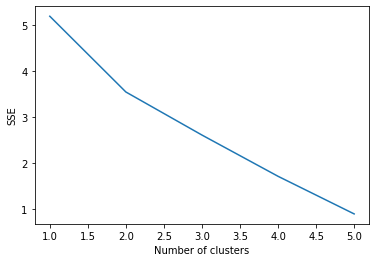

In [55]:
sse = {}
for k in range(1,6):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

#### Use the optimal k value obtained from the above graph

In [56]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 2

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [57]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
4,Saigon Outcast,10.816942,106.729829,1,Indian Restaurant,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Convenience Store
5,Pasteur Street Brewing Company,10.775220,106.700894,0,Hotel,Coffee Shop,Café,Spa,French Restaurant,Italian Restaurant,Massage Studio,Asian Restaurant,Burger Joint,BBQ Joint
106,Công viên Gia Định (Gia Dinh Park),10.812525,106.677332,0,Café,Convenience Store,Flea Market,Electronics Store,Department Store,French Restaurant,Food Truck,Flower Shop,Eastern European Restaurant,Video Game Store
116,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,10.859220,106.585216,1,BBQ Joint,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Convenience Store
119,Giang Điền waterfall,10.915094,106.992683,0,Asian Restaurant,Halal Restaurant,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
121,Cu Chi Tunnels (Ben Duoc),11.141302,106.462160,1,Motorcycle Shop,Video Game Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
126,Khu Du Lịch Đại Nam,11.039556,106.628966,0,Asian Restaurant,Halal Restaurant,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
129,Cu Chi Tunnels Shooting Range,11.059398,106.528242,0,Tunnel,Halal Restaurant,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant
2472,Ho Tram Beach,10.469197,107.399907,0,Asian Restaurant,Spa,Convenience Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store


# Visualize Clusters

In [58]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Examine each cluster and determine the businesses that distinguish each cluster.

#### Cluster 1

In [59]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
5,Pasteur Street Brewing Company,Hotel,Coffee Shop,Café,Spa,French Restaurant,Italian Restaurant,Massage Studio,Asian Restaurant,Burger Joint,BBQ Joint
106,Công viên Gia Định (Gia Dinh Park),Café,Convenience Store,Flea Market,Electronics Store,Department Store,French Restaurant,Food Truck,Flower Shop,Eastern European Restaurant,Video Game Store
119,Giang Điền waterfall,Asian Restaurant,Halal Restaurant,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
126,Khu Du Lịch Đại Nam,Asian Restaurant,Halal Restaurant,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store
129,Cu Chi Tunnels Shooting Range,Tunnel,Halal Restaurant,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant
2472,Ho Tram Beach,Asian Restaurant,Spa,Convenience Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store


#### Cluster 2

In [60]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
4,Saigon Outcast,Indian Restaurant,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Convenience Store
116,Tùng Sơn Thạch Hoa Viên - Rin Rin Park,BBQ Joint,Video Game Store,Department Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Convenience Store
121,Cu Chi Tunnels (Ben Duoc),Motorcycle Shop,Video Game Store,French Restaurant,Food Truck,Flower Shop,Flea Market,Electronics Store,Eastern European Restaurant,Department Store,Convenience Store


#### Cluster 3

In [61]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
